In [32]:
!pip install pandas
!pip install matplotlib
!pip install pyodbc

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import sys
print(sys.executable)
print(sys.version)


D:\Anaconda\python.exe
3.13.5 | packaged by Anaconda, Inc. | (main, Jun 12 2025, 16:37:03) [MSC v.1929 64 bit (AMD64)]


In [4]:
import sys
!"D:\Anaconda\python.exe" -m pip install kagglehub

In [5]:
import kagglehub
print("kagglehub version:", kagglehub.__version__)


kagglehub version: 0.3.13


In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("isaaclopgu/share-of-population-living-in-extreme-poverty")

print("Path to dataset files:", path)

100%|████████████████████████████████████████████████████████████████████████████████| 467k/467k [00:04<00:00, 101kB/s]

Extracting files...


Path to dataset files: C:\Users\LENOVO\.cache\kagglehub\datasets\isaaclopgu\share-of-population-living-in-extreme-poverty\versions\3


In [12]:
## RAW CSV file 
file_path = "population.csv"

df = pd.read_csv(file_path)

df.head(5)


,region_name,region_code,country_name,country_code,reporting_year,reporting_level,survey_acronym,survey_coverage,survey_year,welfare_type,...,reporting_pop,reporting_gdp,reporting_pce,is_interpolated,distribution_type,estimation_type,spl,spr,pg,estimate_type
0,Sub-Saharan Africa,SSA,Angola,AGO,2000,national,HBS,national,2000.21,consumption,...,16310860.19,1932.988479,NaN,False,micro,survey,3.950,0.371469,9.609202,NaN
1,Sub-Saharan Africa,SSA,Angola,AGO,2008,national,IBEP-MICS,national,2008.50,consumption,...,21996714.00,3193.287723,1268.614278,False,micro,survey,3.967,0.353358,6.838756,NaN
2,Sub-Saharan Africa,SSA,Angola,AGO,2018,national,IDREA,national,2018.17,consumption,...,31480496.09,2775.746423,1605.110432,False,micro,survey,3.240,0.421619,10.964242,NaN
3,Europe & Central Asia,ECA,Albania,ALB,1996,national,EWS,national,1996.00,consumption,...,3168033.00,1633.552000,1716.336801,False,micro,survey,5.010,0.203902,4.209428,NaN
4,Europe & Central Asia,ECA,Albania,ALB,2002,national,LSMS,national,2002.00,consumption,...,3051010.00,2247.498080,1685.203078,False,micro,survey,4.859,0.224404,4.429310,NaN


In [13]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.columns)

Index(['region_name', 'region_code', 'country_name', 'country_code',
       'reporting_year', 'reporting_level', 'survey_acronym',
       'survey_coverage', 'survey_year', 'welfare_type',
       'survey_comparability', 'comparable_spell', 'poverty_line', 'headcount',
       'poverty_gap', 'poverty_severity', 'watts', 'mean', 'median', 'mld',
       'gini', 'polarization', 'decile1', 'decile2', 'decile3', 'decile4',
       'decile5', 'decile6', 'decile7', 'decile8', 'decile9', 'decile10',
       'cpi', 'ppp', 'reporting_pop', 'reporting_gdp', 'reporting_pce',
       'is_interpolated', 'distribution_type', 'estimation_type', 'spl', 'spr',
       'pg', 'estimate_type'],
      dtype='object')


In [14]:
columns_of_interest = [
    "region_name", "country_name", "reporting_year",
    "headcount", "poverty_gap", "poverty_severity",
    "mean", "median", "gini", "decile1", "decile10"
]

df_clean = df[columns_of_interest]
df_clean.head()


,region_name,country_name,reporting_year,headcount,poverty_gap,poverty_severity,mean,median,gini,decile1,decile10
0,Sub-Saharan Africa,Angola,2000,0.769140,0.433468,0.294131,8.380261,5.300380,0.519451,0.009910,0.401682
1,Sub-Saharan Africa,Angola,2008,0.784108,0.419457,0.265238,7.401682,5.334158,0.427155,0.020723,0.323016
2,Sub-Saharan Africa,Angola,2018,0.858377,0.528766,0.376314,6.218052,3.879510,0.512643,0.013347,0.396217
3,Europe & Central Asia,Albania,1996,0.715901,0.266195,0.126458,8.442033,7.419330,0.270103,0.038818,0.207110
4,Europe & Central Asia,Albania,2002,0.731792,0.289665,0.143990,8.628334,7.117154,0.317390,0.035235,0.253399


In [39]:
df_clean = df[columns_of_interest].copy()  # <--- add .copy()
df_clean[numeric_cols] = df_clean[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [40]:
df_clean = df_clean.dropna()  # or fillna(0) if you prefer


In [41]:
df_clean = df_clean[df_clean["reporting_year"] >= 2000]


In [42]:
# Keep only unique rows based on primary key
df_unique = df.drop_duplicates(subset=['country_name', 'reporting_year'])

In [43]:
df_clean.to_csv("population_cleaned.csv", index=False)
print("Cleaned data saved!")

Cleaned data saved!


In [44]:
## Cleaned CSV file
file_path = "population_cleaned.csv"

df = pd.read_csv(file_path)

df.head(5)


,region_name,country_name,reporting_year,headcount,poverty_gap,poverty_severity,mean,median,gini,decile1,decile10
0,Sub-Saharan Africa,Angola,2000,0.769140,0.433468,0.294131,8.380261,5.300380,0.519451,0.009910,0.401682
1,Sub-Saharan Africa,Angola,2008,0.784108,0.419457,0.265238,7.401682,5.334158,0.427155,0.020723,0.323016
2,Sub-Saharan Africa,Angola,2018,0.858377,0.528766,0.376314,6.218052,3.879510,0.512643,0.013347,0.396217
3,Europe & Central Asia,Albania,2002,0.731792,0.289665,0.143990,8.628334,7.117154,0.317390,0.035235,0.253399
4,Europe & Central Asia,Albania,2005,0.644111,0.227527,0.105784,9.753929,8.300111,0.305957,0.034870,0.243316


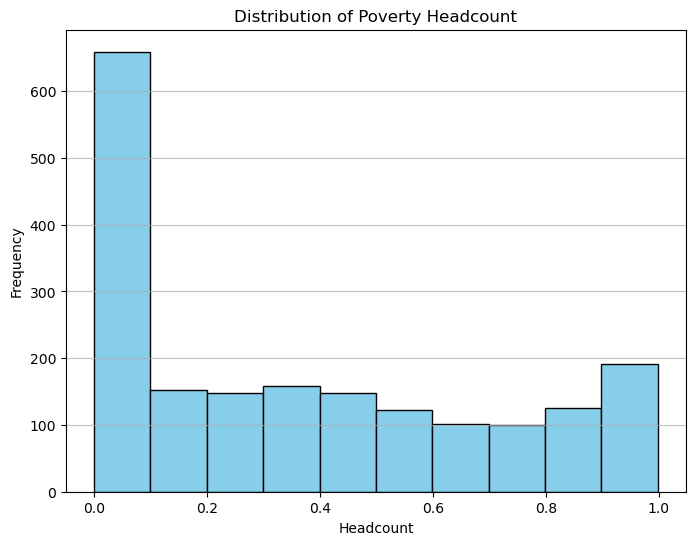

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.hist(df['headcount'], bins=10, color='skyblue', edgecolor='black')
plt.title("Distribution of Poverty Headcount")
plt.xlabel("Headcount")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.show()


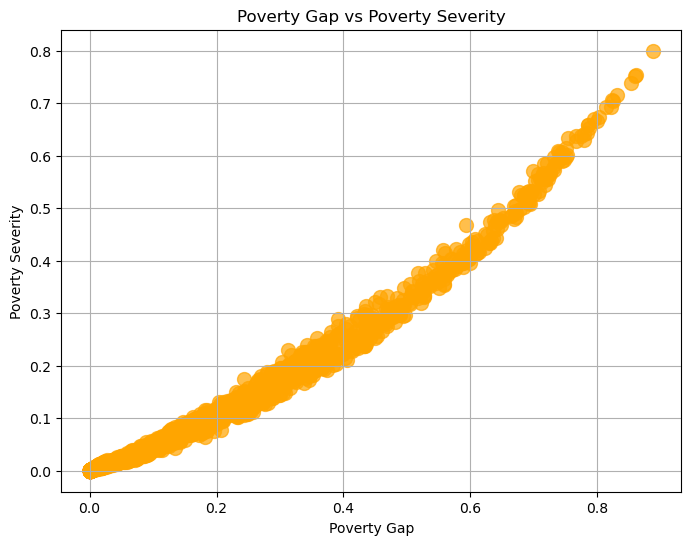

In [46]:

# 2. Scatter Plot: Poverty Gap vs Poverty Severity
plt.figure(figsize=(8,6))
plt.scatter(df['poverty_gap'], df['poverty_severity'], c='orange', s=100, alpha=0.7)
plt.title("Poverty Gap vs Poverty Severity")
plt.xlabel("Poverty Gap")
plt.ylabel("Poverty Severity")
plt.grid(True)
plt.show()

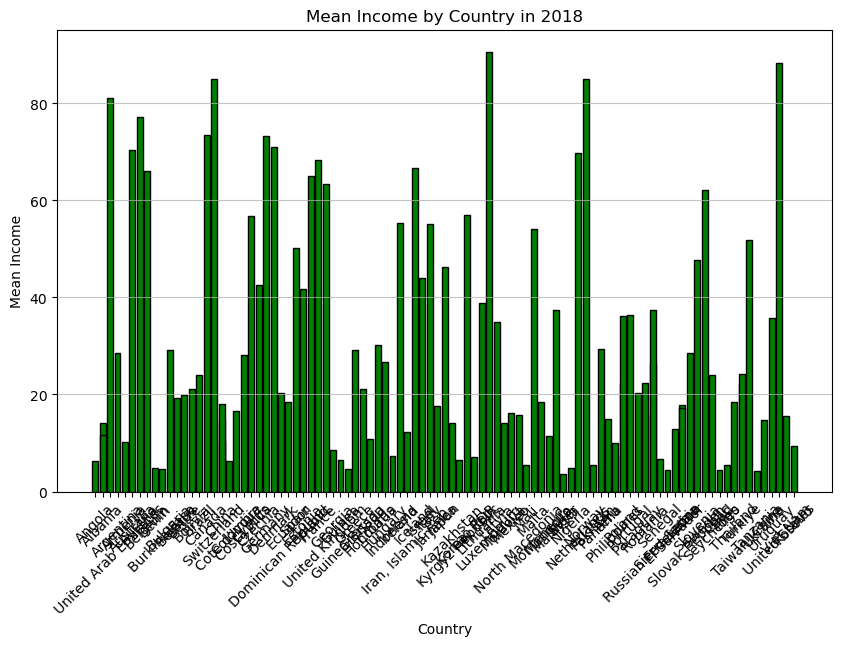

In [47]:
# 3. Bar Plot: Mean Income by Country (for a specific year, e.g., 2018)
year = 2018
df_year = df[df['reporting_year'] == year]
plt.figure(figsize=(10,6))
plt.bar(df_year['country_name'], df_year['mean'], color='green', edgecolor='black')
plt.title(f"Mean Income by Country in {year}")
plt.xlabel("Country")
plt.ylabel("Mean Income")
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

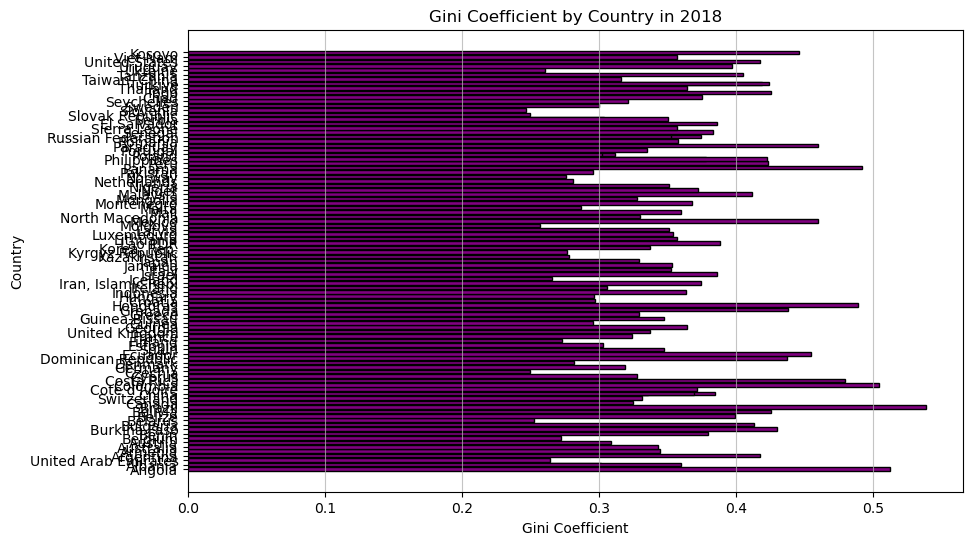

In [50]:

# 4. Horizontal Bar Plot: Gini Coefficient by Country in a specific year
plt.figure(figsize=(10,6))
plt.barh(df_year['country_name'], df_year['gini'], color='purple', edgecolor='black')
plt.title(f"Gini Coefficient by Country in {year}")
plt.xlabel("Gini Coefficient")
plt.ylabel("Country")
plt.grid(axis='x', alpha=0.75)
plt.show()

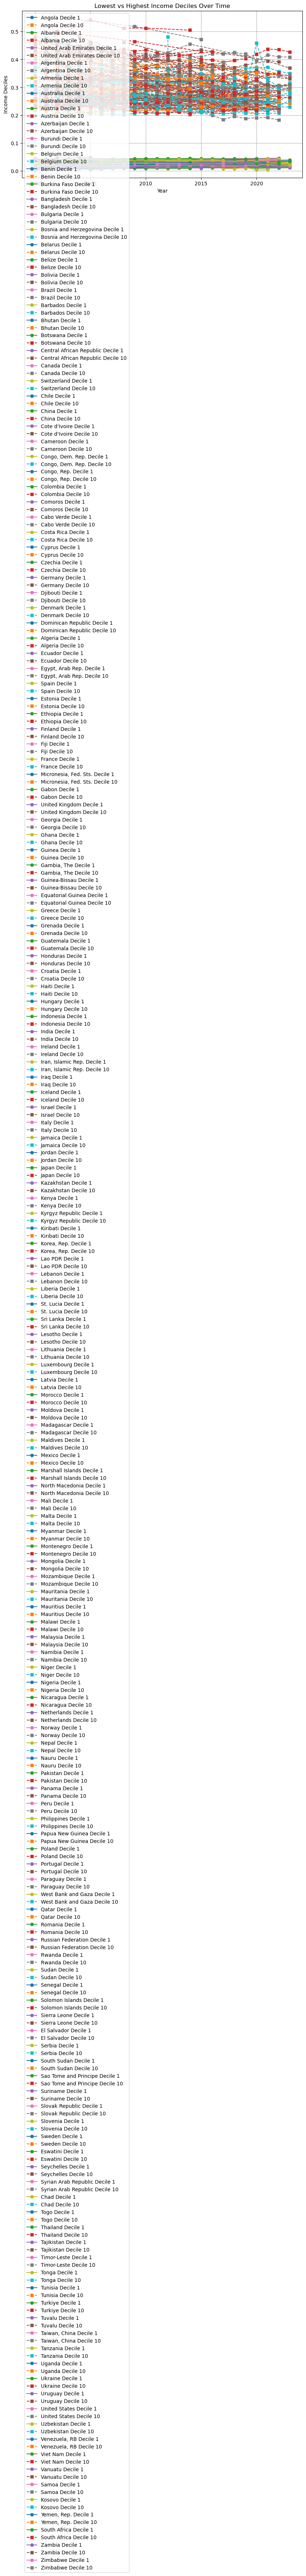

In [49]:
# 5. Lowest vs Highest Income Deciles over time
plt.figure(figsize=(10,6))
for country in df['country_name'].unique():
    country_data = df[df['country_name'] == country]
    plt.plot(country_data['reporting_year'], country_data['decile1'], marker='o', label=f'{country} Decile 1')
    plt.plot(country_data['reporting_year'], country_data['decile10'], marker='s', linestyle='--', label=f'{country} Decile 10')
plt.title("Lowest vs Highest Income Deciles Over Time")
plt.xlabel("Year")
plt.ylabel("Income Deciles")
plt.legend()
plt.grid(True)
plt.show()

In [54]:
import pyodbc 
conn = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=DESKTOP-G6ELT03;"
    "DATABASE=Quotes;"
    "Trusted_Connection=yes;"
)

cursor = conn.cursor()


# Prepare insert query
insert_query = """
INSERT INTO dbo.Population
(region_name, country_name, reporting_year, headcount, poverty_gap, poverty_severity, mean, median, gini, decile1, decile10)
VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
"""

# Enable fast insert for large datasets
cursor.fast_executemany = True

# Convert DataFrame to list of tuples
data = [tuple(row) for row in df.to_numpy()]

# Execute insert
cursor.executemany(insert_query, data)
conn.commit()
print("Data inserted successfully!")



Data inserted successfully!
